In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

def load_df(file_name):
    df = pd.DataFrame(pd.read_pickle(file_name))
    return df

In [2]:
#load broad data and close up on high remove p data
er3 = load_df("compiled_output_jj6_random_digraph.pkl")
#Remove failed experiments
er3 = er3[er3['adj_size']>0]

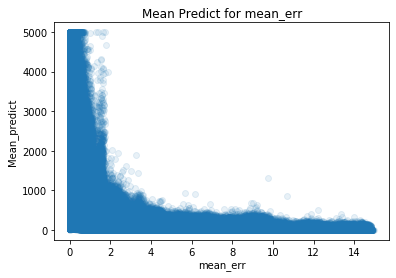

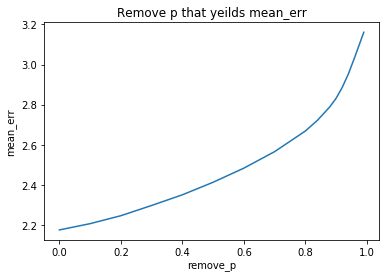

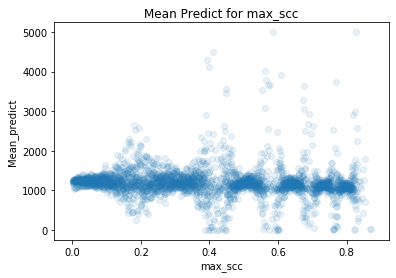

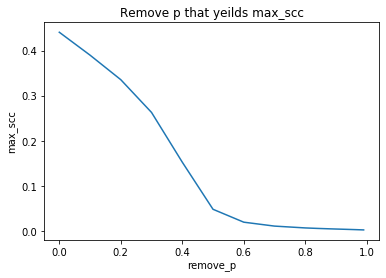

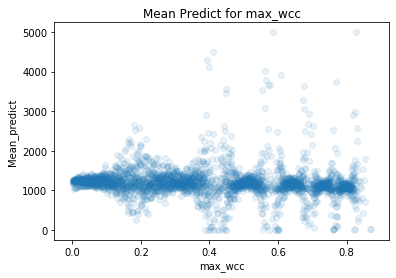

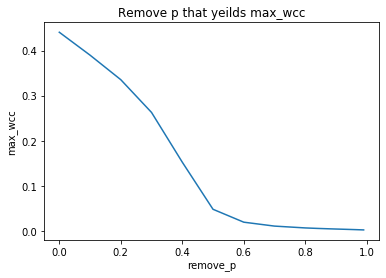

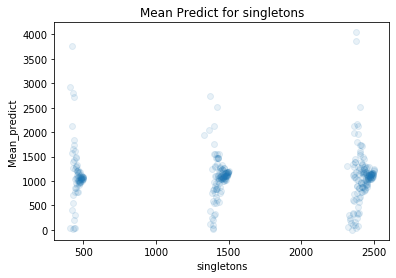

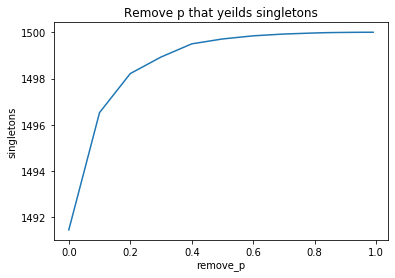

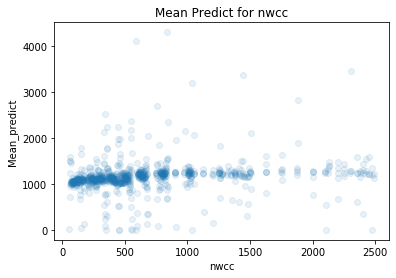

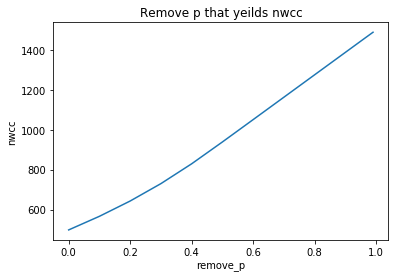

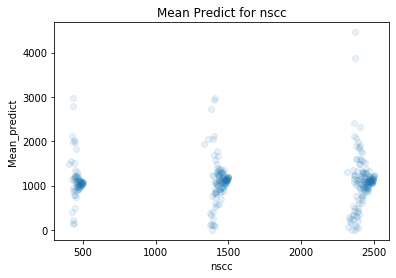

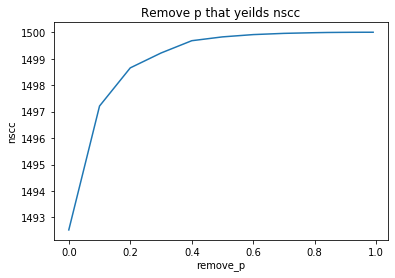

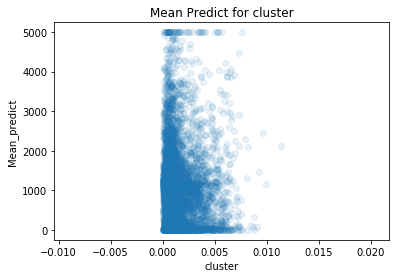

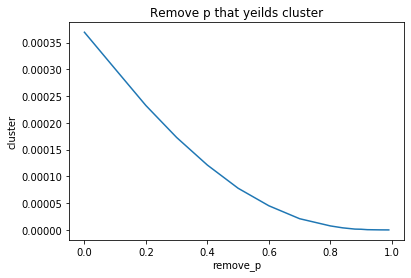

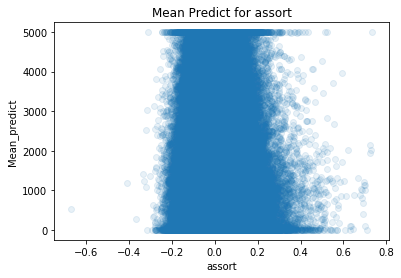

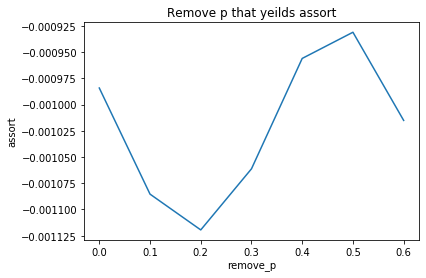

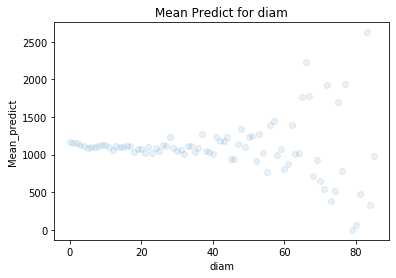

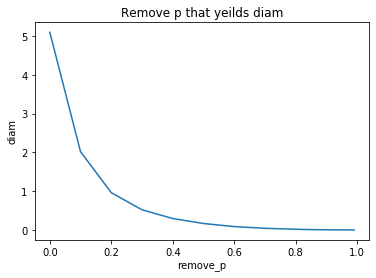

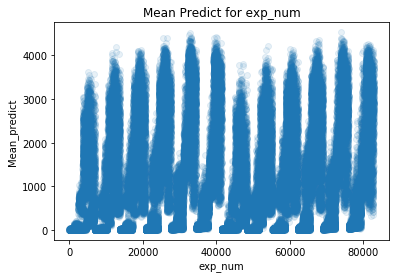

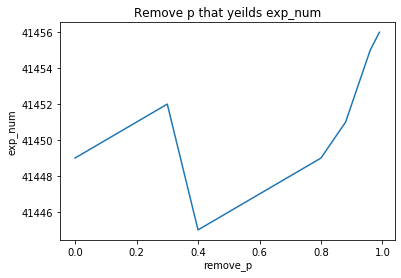

In [4]:
col = ['mean_err', 'max_scc',
       'max_wcc', 'singletons', 'nwcc', 'nscc', 'cluster',
       'assort', 'diam', 'exp_num']
for i in col:
    "Graph column on x and mean predict on y"
    df1=er3.groupby(er3[i]).aggregate(np.mean)
    plt.scatter(df1.index,df1["mean_pred"],alpha=.1)
    plt.title("Mean Predict for " + i)
    plt.xlabel(i)
    plt.ylabel("Mean_predict")
    plt.show()
    "Graph remove_p on x and column on y"
    df2=er3.groupby(er3["remove_p"]).aggregate(np.mean)
    plt.plot(df2.index,df2[i])
    plt.title("Remove p that yeilds " + i)
    plt.xlabel("remove_p")
    plt.ylabel(i)
    plt.show()
    

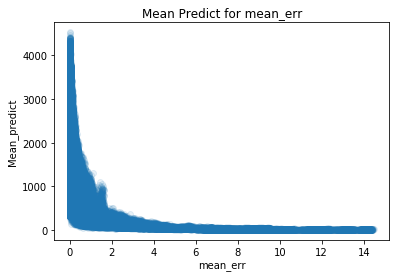

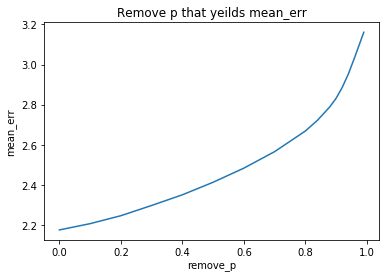

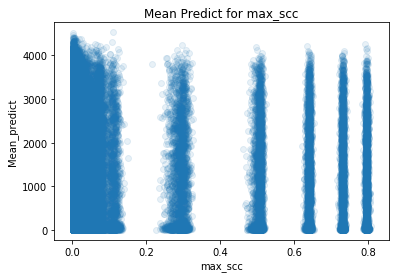

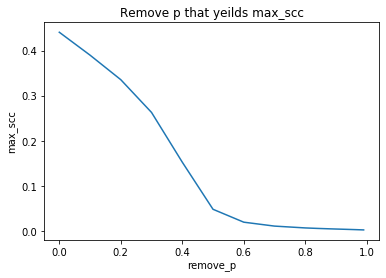

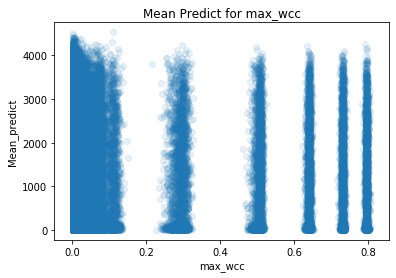

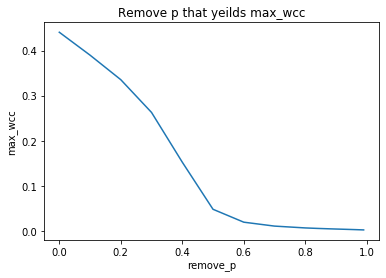

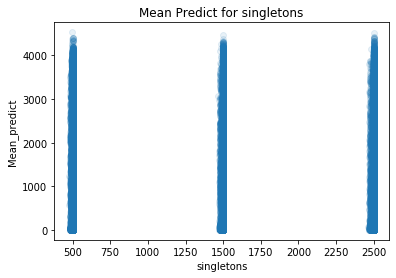

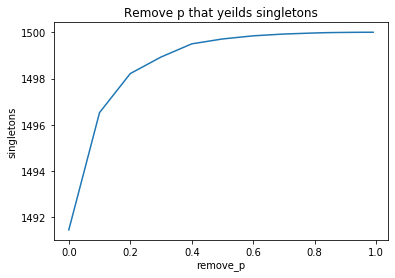

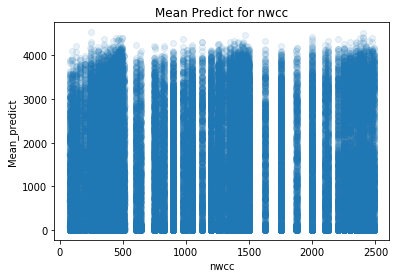

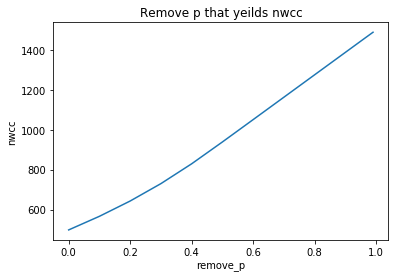

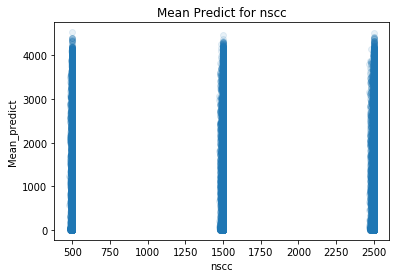

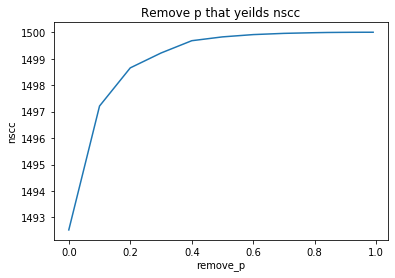

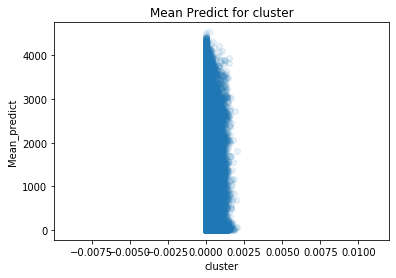

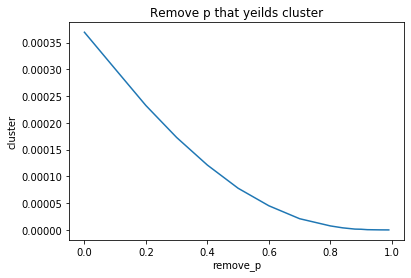

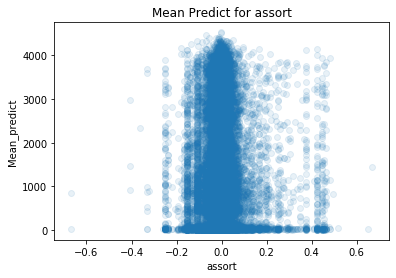

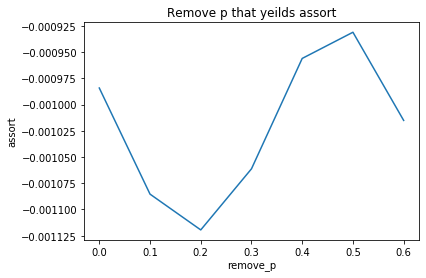

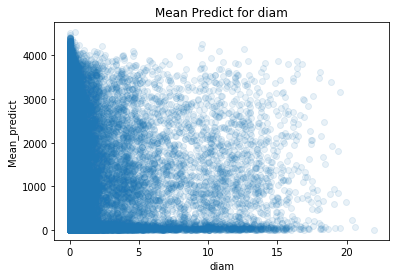

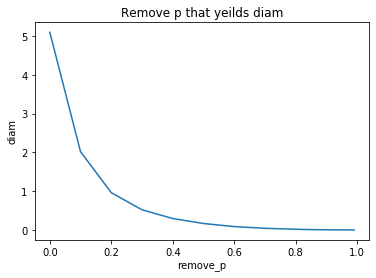

In [5]:
col = ['mean_err', 'max_scc',
       'max_wcc', 'singletons', 'nwcc', 'nscc', 'cluster',
       'assort', 'diam']
for i in col:
    "Graph column on x and mean predict on y"
    df1=er3.groupby(er3["exp_num"]).aggregate(np.mean)
    plt.scatter(df1[i],df1["mean_pred"],alpha=.1)
    plt.title("Mean Predict for " + i)
    plt.xlabel(i)
    plt.ylabel("Mean_predict")
    plt.show()
    "Graph remove_p on x and column on y"
    df2=er3.groupby(er3["remove_p"]).aggregate(np.mean)
    plt.plot(df2.index,df2[i])
    plt.title("Remove p that yeilds " + i)
    plt.xlabel("remove_p")
    plt.ylabel(i)
    plt.show()
    

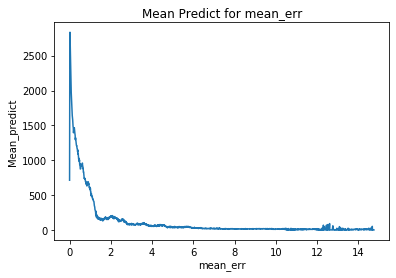

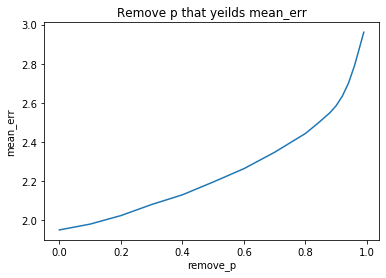

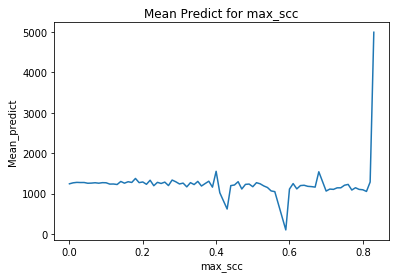

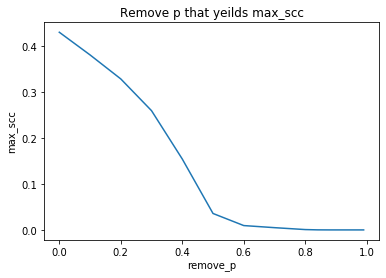

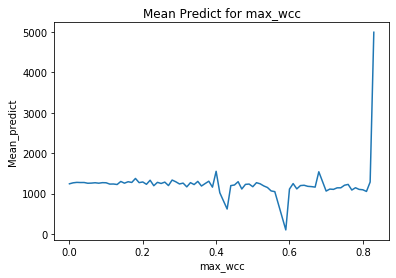

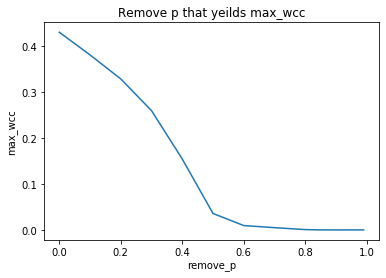

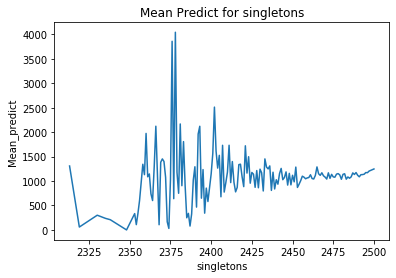

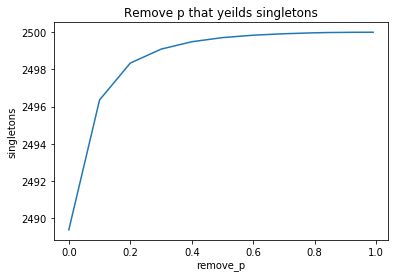

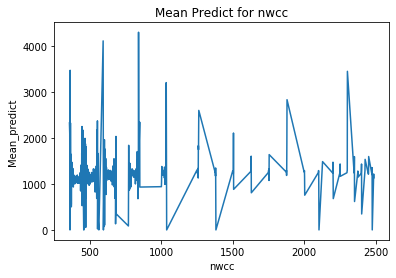

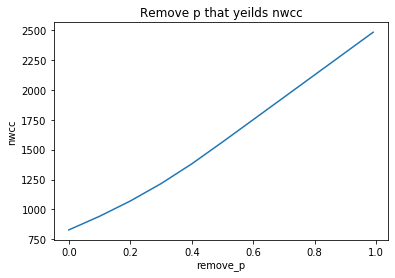

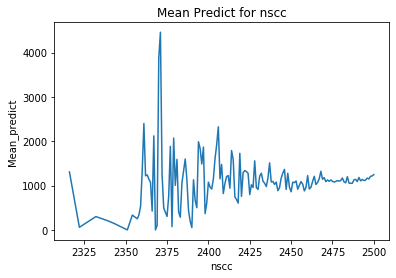

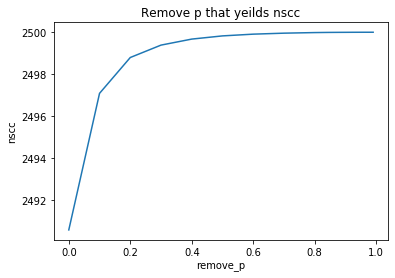

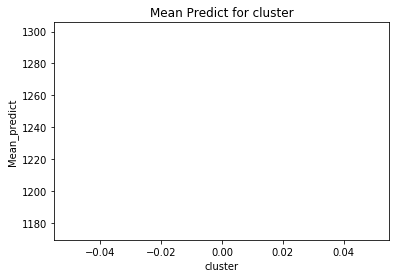

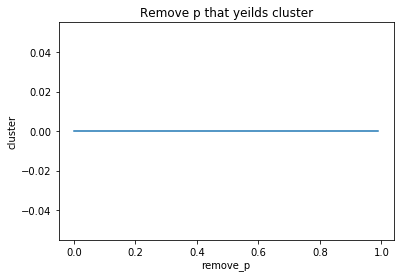

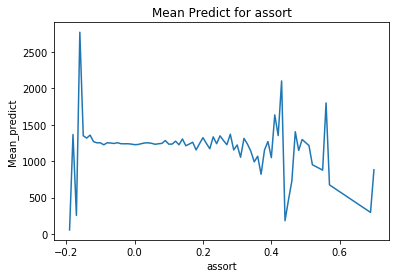

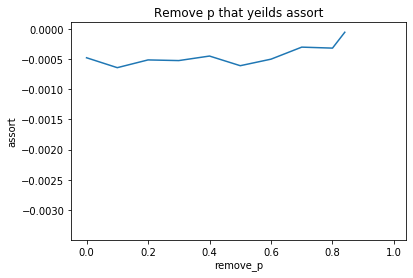

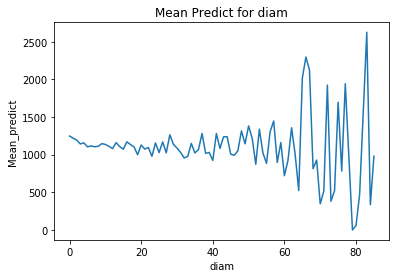

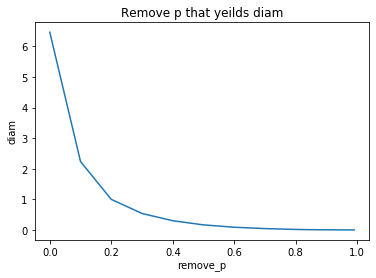

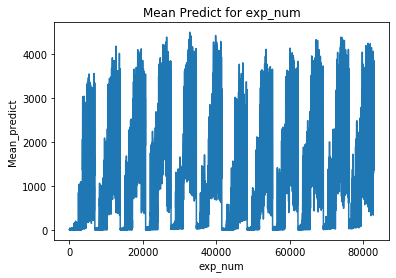

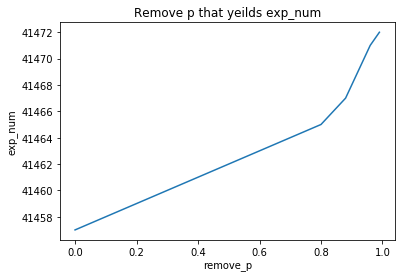

In [6]:
col = ['mean_err', 'max_scc',
       'max_wcc', 'singletons', 'nwcc', 'nscc', 'cluster',
       'assort', 'diam', 'exp_num']
er4 = er3[er3['adj_size']==2500].copy()
for i in col:
    "Graph column on x and mean predict on y"
    er4[i] = np.round(er4[i],decimals=2)
    df1=er4.groupby(er4[i]).aggregate(np.mean)
    plt.plot(df1.index,df1["mean_pred"])
    plt.title("Mean Predict for " + i)
    plt.xlabel(i)
    plt.ylabel("Mean_predict")
    plt.show()
    "Graph remove_p on x and column on y"
    df2=er4.groupby(er4["remove_p"]).aggregate(np.mean)
    plt.plot(df2.index,df2[i])
    plt.title("Remove p that yeilds " + i)
    plt.xlabel("remove_p")
    plt.ylabel(i)
    plt.show()
    

In [20]:
er3.remove_p.unique()

array([0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.84, 0.88,
       0.9 , 0.92, 0.94, 0.96, 0.99])

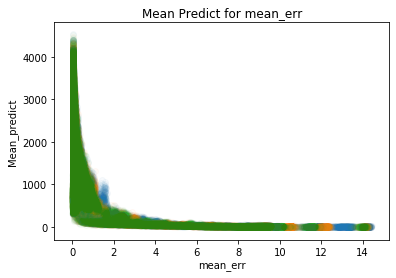

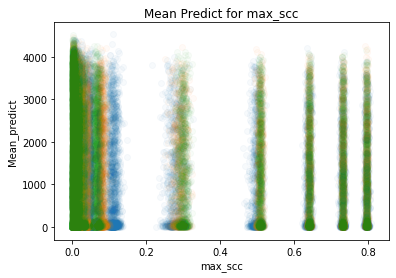

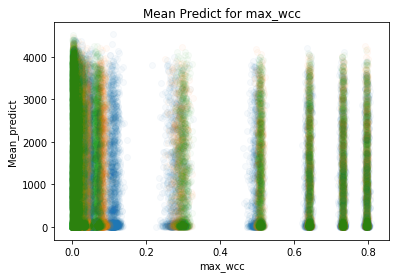

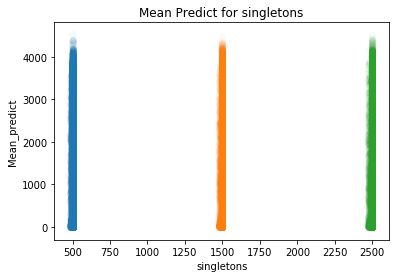

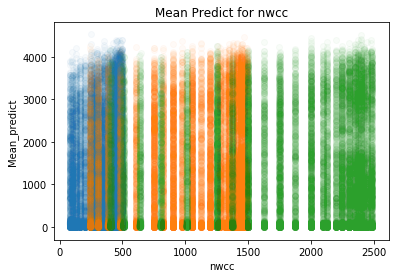

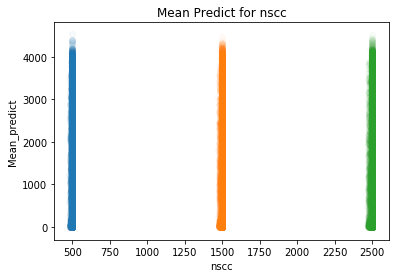

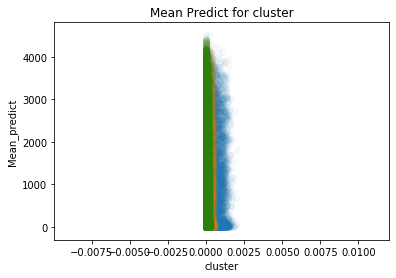

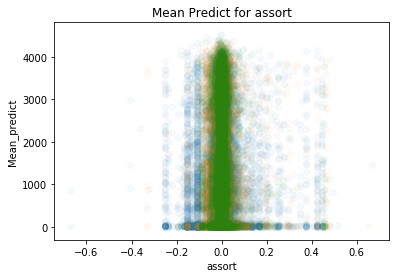

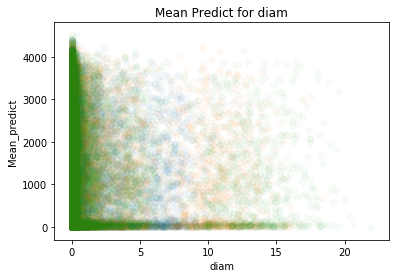

KeyError: 'exp_num'

In [8]:
for i in col:
    "Graph column on x and mean predict on y"
    df1=er3.groupby(er3["exp_num"]).aggregate(np.mean)
    plt.scatter(df1[i][df1["adj_size"]==500],df1["mean_pred"][df1["adj_size"]==500],alpha=.03)
    plt.scatter(df1[i][df1["adj_size"]==1500],df1["mean_pred"][df1["adj_size"]==1500],alpha=.03)
    plt.scatter(df1[i][df1["adj_size"]==2500],df1["mean_pred"][df1["adj_size"]==2500],alpha=.03)
    plt.title("Mean Predict for " + i)
    plt.xlabel(i)
    plt.ylabel("Mean_predict")
    plt.show()

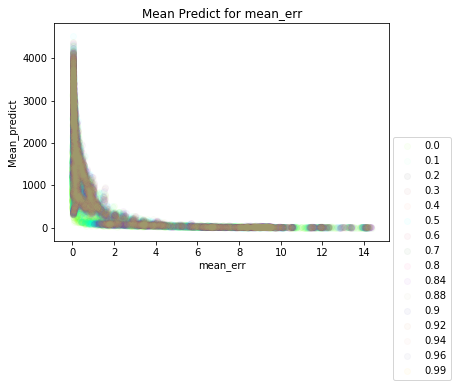

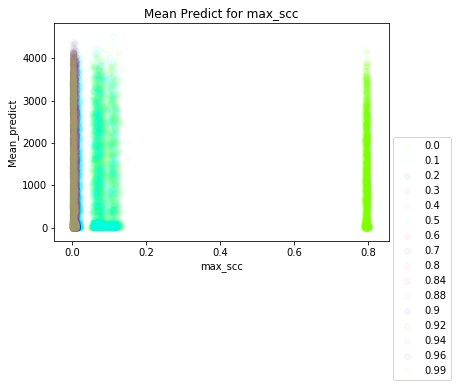

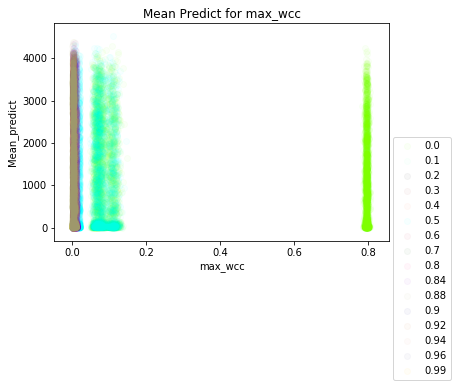

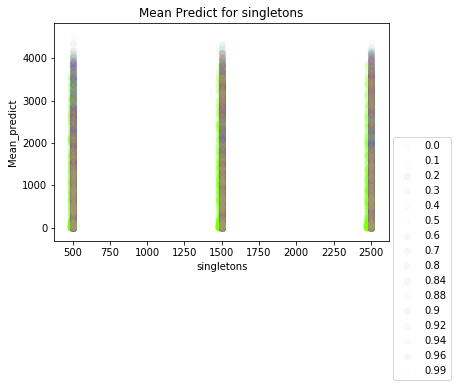

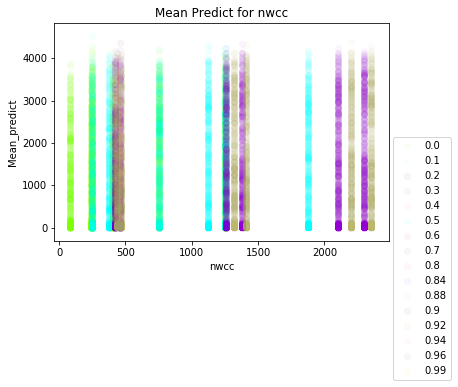

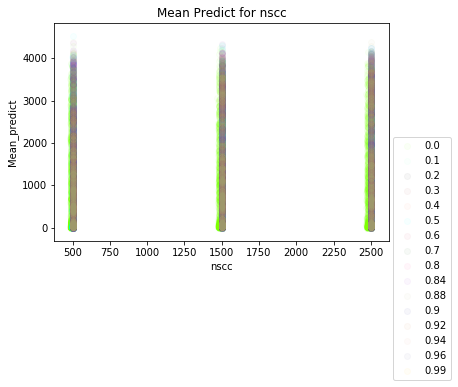

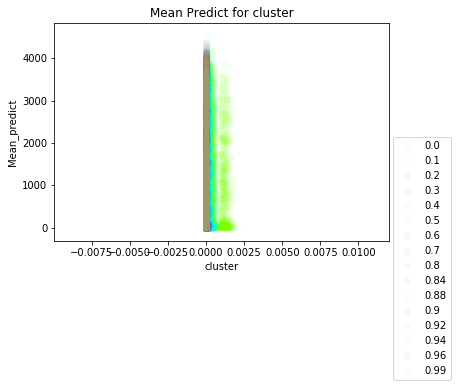

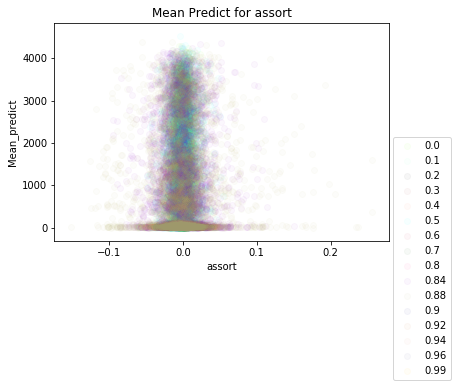

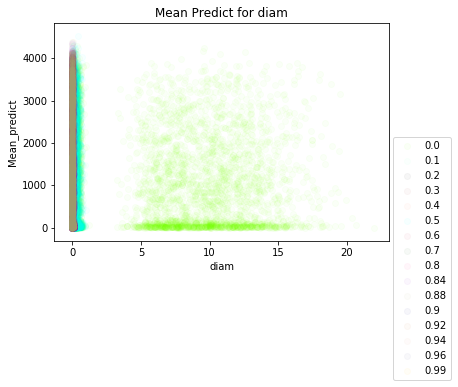

KeyError: 'exp_num'

In [21]:
colors = {0:'chartreuse', .1:'aquamarine'
, .2:'black', .3:'brown'
, .4:'coral', .5:'cyan'
, .6:'crimson', .7:'darkgreen'
, .8:'deeppink', .84:'darkviolet'
, .88:'darkkhaki', .9:'darkblue'
, .92:'chocolate', .94:'darksalmon'
, .96:'darkslateblue', .98:'cornflowerblue'
, .99:'gold'}
for i in col:
    "Graph column on x and mean predict on y"
    df1=er3.groupby(er3["exp_num"]).aggregate(np.mean)
    for j in er3.remove_p.unique():
        plt.scatter(df1[i][df1["remove_p"]==j],df1["mean_pred"][df1["remove_p"]==j],alpha=.03,label=j,color=colors[j])
    plt.legend(bbox_to_anchor=(1.2,0.5))
    plt.title("Mean Predict for " + i)
    plt.xlabel(i)
    plt.ylabel("Mean_predict")
    plt.show()

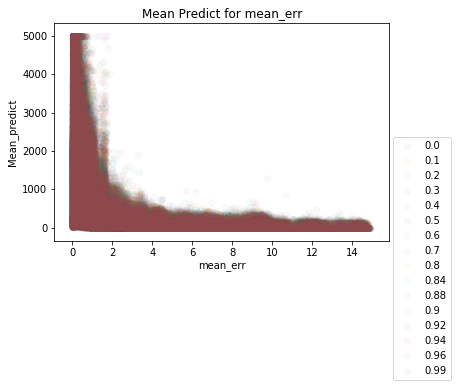

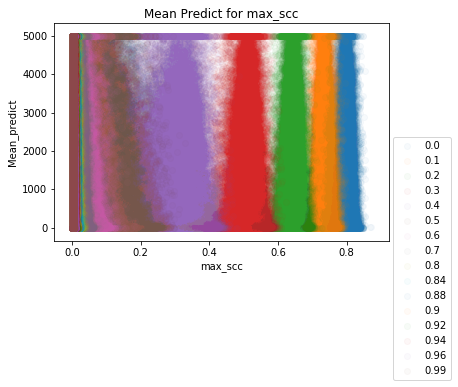

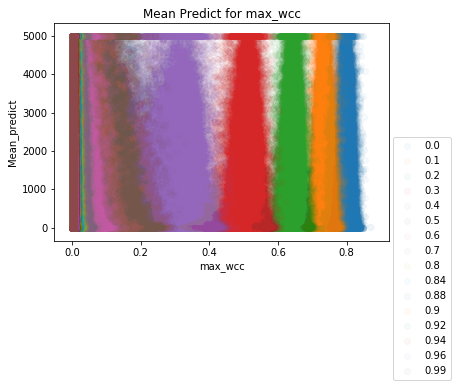

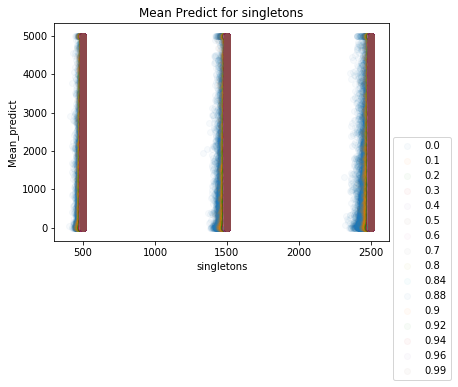

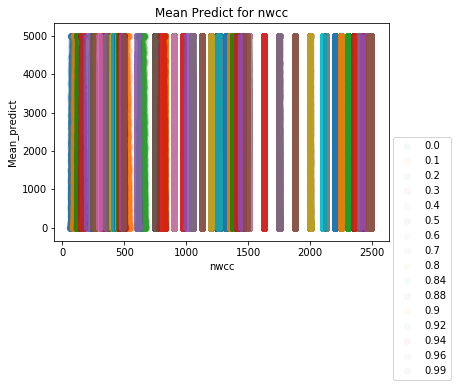

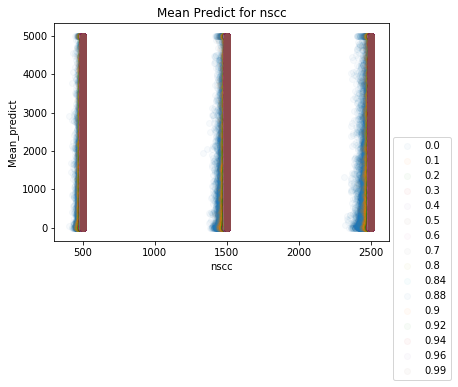

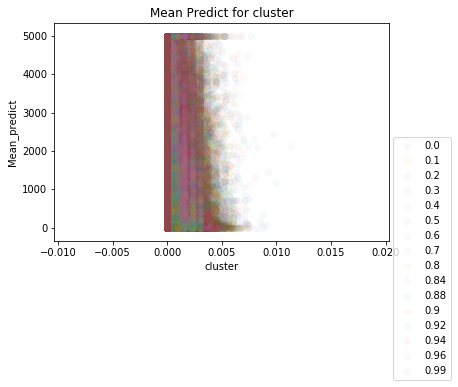

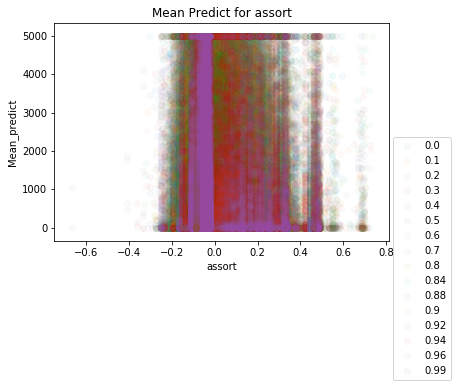

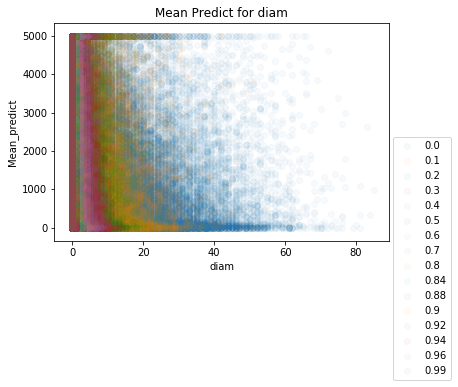

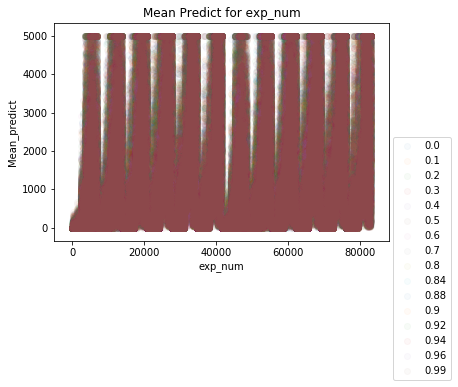

In [17]:
for i in col:
    "Graph column on x and mean predict on y"
    for j in er3.remove_p.unique():
        plt.scatter(er3[i][er3["remove_p"]==j],er3["mean_pred"][er3["remove_p"]==j],alpha=.03,label=j)
    plt.legend(bbox_to_anchor=(1.2,0.5))
    plt.title("Mean Predict for " + i)
    plt.xlabel(i)
    plt.ylabel("Mean_predict")
    plt.show()

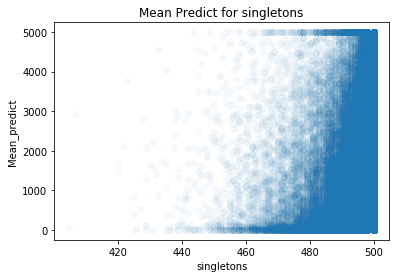

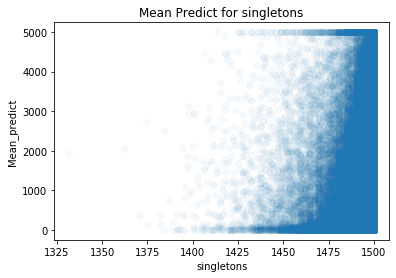

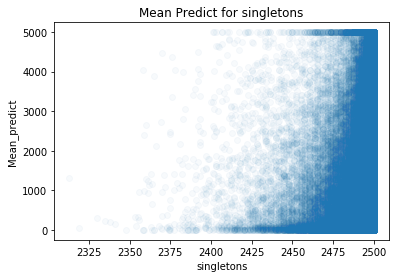

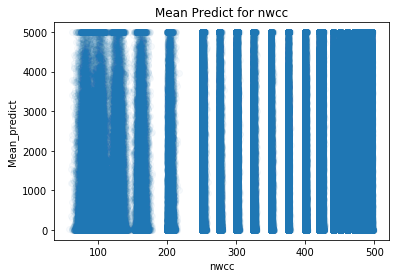

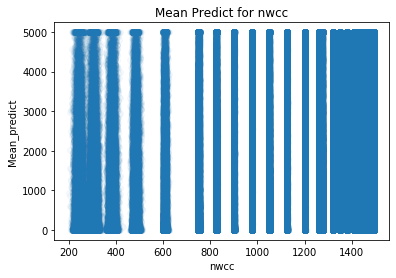

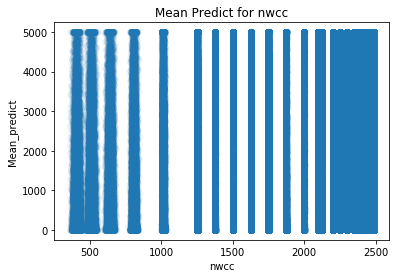

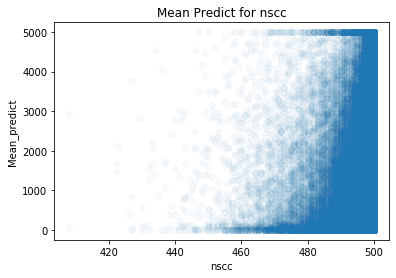

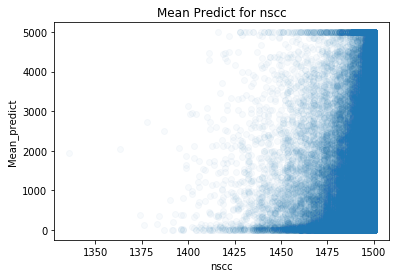

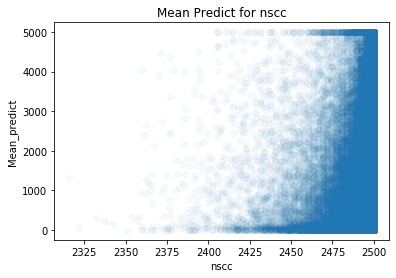

In [23]:
new_col_size = ['singletons', 'nwcc', 'nscc']
new_col_pred = ['max_wcc', 'cluster', 'assort', 'diam']
for i in new_col_size:
    "Graph column on x and mean predict on y"
    for j in er3.adj_size.unique():
        plt.scatter(er3[i][er3["adj_size"]==j],er3["mean_pred"][er3["adj_size"]==j],alpha=.03)
        plt.title("Mean Predict for " + i)
        plt.xlabel(i)
        plt.ylabel("Mean_predict")
        plt.show()